## High Harmonic Generation: The Semiclasssical Approach

High-harmonic generation is the creation of high energy (up to soft x-ray) photons from the interaction of low energy (infrared) light with matter. Despite the highly nonlinear, nonperturbative nature of this effect, it can be understood quite well through a semiclassical three-step process: ionization of the electron from its parent atom, propagation of the free electron in the continuum, and recombination of the electron with its parent atom. In this research project, the mentee will learn about the three-step model for high-harmonic generation in atomic gases through hands-on analytical and numerical problem solving. Special emphasis will be placed on skills such as number sense (large or small parameters), physical argumentation, and numerical techniques like root finding. 

## Week 1: 
### Preliminary: Good Coding Practices in Jupyter Notebook

Jupyter Notebook is a powerful tool for performing scientific computing in Python. A few of my favorite features are the following:
* The ability to run individual cells of code rather than rerunning an entire file every time you make a change
* Editable text using the 'Markdown' cell option, including $\LaTeX$ compatibility for writing equations
* Sharing code with others can be easily accomplished by downloading notebooks as pdfs 

Before getting too deep into our project, we should review some good programming practices. 

**Overall Formatting** I prefer the following setup for my Jupyter Notebook file:
1. Packages that need to be installed
2. Constants / variables
3. Functions needed to run the code
4. simulations and plots
This setup gives the file a clear structure. 

**Comments** Leaving detailed comments in your code can help others (and yourself) understand your code more clearly and limit troubleshooting/guesswork when reading through your file.  It is good practice leaving comments to describe what variables and functions mean or do, as well as any particularly complicated parts of your code. Block comments using the 3 sets of parentheses are great for longer, multiline comments whereas the # inline comments are good for quick explanation. 

**Naming** It is helpful to give variables and functions unique, detailed names. Avoid writing over functions and variables within your code as much as possible. 

**QUESTION** *What are some other good programming practices that you know of?*

In [1]:
# Install relavant packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import m_e, hbar, h, c, pi, epsilon_0, e
from scipy.optimize import minimize_scalar

In [2]:
def f(x,y,z): # function formatting example
    '''
    Block comment describing what this function does
    Description of what each input is, with units when applicable
    '''
    return x*y*z

In [3]:
def get_square(x): # example function
    '''
    return the square of x
    x: number (unitless)
    '''
    return x**2

In [4]:
def g(x):
    '''
    Return g as a function of x
    '''
    return x/4

In [5]:
# example of defining variables
pos_x = np.linspace(-1,1,10) # electron's x-position, in a.u.

### Atomic Units

**LEARNING OBJECTIVES:**
* Understand where atomic units come from and why they are used
* Learn how atomic units are calculated 
* Become comfortable with seeing atomic units

Reference Material:
* A nice introduction to atomic units can be found <a href="https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/08%3A_Multielectron_Atoms/8.01%3A_Atomic_and_Molecular_Calculations_are_Expressed_in_Atomic_Units" target="_blank">here</a>.

* The <a href="https://en.wikipedia.org/wiki/Hartree_atomic_units" target="_blank">Wikipedia page for atomic units</a>.

**QUESTION** What are the units of $m_e$, $e$, $\hbar$, and $4\pi \epsilon_0$?

**QUESTION** The time-independent Schrodinger equation for the hydrogen atom is given by $\left [-\frac{\hbar^2}{2m_e} \nabla^2 - \frac{e^2}{4\pi\epsilon_0 r} \right ] \psi(\mathbf{r}) = E\psi(\mathbf{r})$ . Convert it to atomic units.

**QUESTION** What is one atomic unit of energy in electron-volts? Feel free to use the imported constants for calculation. What atomic quantity do you know that is close to this value?

**QUESTION** What is one atomic unit of velocity? How does this compare to the speed of light?

*In Case of Extra Time*: Review the <a href="https://en.wikipedia.org/wiki/Photoelectric_effect" target="_blank">photoelectric effect</a>. 

In [6]:
def get_AU(M,L,T,C):
    '''
    Return 1 atomic unit (in SI) of a quantity by solving linear equation Ax = b
    M: quantity of interest's power of MASS
    L: quantity of interest's power of LENGTH
    T: quantity of interest's power of TIME
    C: quantity of interest's power of ELECTRIC CHARGE
    '''
    A = np.array([[1, 1, 0, -1], # coefficients for matrix
              [2, 0, 0, -3],     # Columns (from left to right) correspond to powers of hbar, m_e, e, 4\pi\epsilon_0
              [-1, 0, 0, 2],
              [0, 0, 1, 2]])
    
    b = np.array([M,L,T,C])  # 
    x = np.linalg.solve(A,b) # powers of fundamental atomic units, for [hbar, m_e, e, 4\pi\epsilon_0]
    
    valAU = hbar**(x[0]) * m_e**(x[1]) * e**(x[2]) * (4*pi*epsilon_0)**(x[3]) # value in SI
    
    return x, valAU

## Week Two: Ionization

This week, we will learn about the ionization step in high-harmonic generation. This process is usually referred to as strong field ionization because we use very strong electric fields to ionize targets. **Our learning objectives are the following:**
* Write down an expression for the electric potential experienced by an electron interacting with its parent helium atom and the laser electric field
* Plot the electric potential (this can be used in your poster at the end of the semester!)
* Reflect on how strong field ionization is different from the photoelectric effect

Consider helium atoms interacting with laser light that has an intensity of $I=10^{14}\text{ W/cm}^2$. Helium has an ionization energy of $I_p\approx24.6\text{ eV}$. **A few questions:**
* How does the laser intensity compare to the intensity of light from the sun at Earth's surface?
* How does helium's ionization energy compare to the energy needed to ionize hydrogen?

Below, we convert these constants into atomic units using our handy `get_AU` function. Furthermore, we calculate the peak electric field from the intensity, $E_0 = \sqrt{I}$. 

In [7]:
Intensity = 1e14 # Intensity in W/cm^2

Ip_eV = 24.587387936 # Ioniation potential of helium, in eV

IntensityAU = Intensity / (3.509*1e16) # Intensity in AU
E0 = np.sqrt(IntensityAU) # Peak electric field strength AU

Ip = Ip_eV * e / get_AU(1,2,-2,0)[1]

In [8]:
get_AU(1,0,-3,0)[1]

6.436409900495542e+19

The electric field experienced by an electron interacting with the Helium nucleus and the laser is given by 
\begin{equation}
\mathbf{E}(\mathbf{x},t) = -\frac{e Z}{4\pi \epsilon_0 x^2} \mathbf{\hat{x}} + E_0 \cos(\omega t) \mathbf{\hat{x}}. 
\end{equation}
The left term comes from the Coulomb attraction between the electron and nucleus. Here, $Z=2$ because helium has two protons. The right term is the oscillating electric field from the laser. 

**Questions:**
* Convert this equation for the electric field to atomic units. 
* Calculate the scalar potential $\phi(\mathbf{x},t) = - \int \mathbf{E}(\mathbf{x},t) \cdot d\mathbf{x}$ (in atomic units) 
* If you know the scalar potential $\phi(\mathbf{x},t)$, what is the potential energy in atomic units?
* Write a function `get_potential(x,phi)` which takes arguments for the position `x` and laser phase `phase`($=\omega t$)  and returns the electric potential $\phi(\mathbf{x},t\rightarrow \omega t)$. 

In [9]:
def get_potential(x, phase):
    '''
    return the scalar potential for an electron experiencing 
    an electrostatic force from its parent atom and the laser electric field
    x: distance from atomic nucleus, in AU
    phi: phase argument for oscillating field
    '''
    return -E0*np.cos(phase)*x - 2/(abs(x))
    #return 0*(x) + 0*(phase) # fake return result. This is a placeholder for your actual equation

The code below calculates the potential in the array `potential` for a range of positions `xvals`. It then plots the electric potential and helium ionization energy as a function of position. 

In [10]:
xvals = np.linspace(-50,50,5000) # array of r values, in AU
potential = get_potential(xvals,0) # get potential from the function

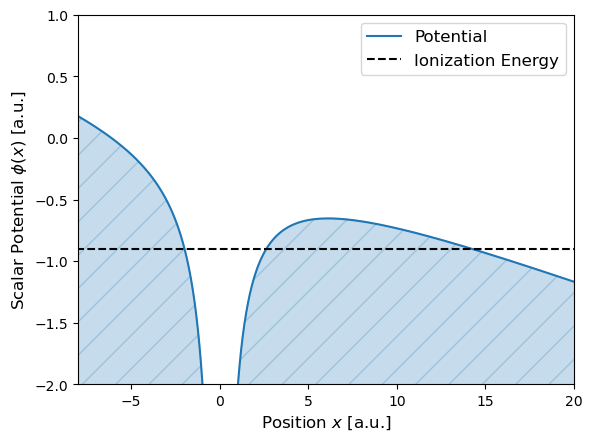

In [11]:
# Plot the electric potential experienced by the electron
plt.plot(xvals, potential, label='Potential')
plt.hlines(-Ip,xmin=xvals[0],xmax=xvals[-1], linestyles='--', color='k', label='Ionization Energy')
plt.ylim((-2,1))
plt.xlim((-8,20))

plt.fill_between(xvals, -5, potential, color='tab:blue', alpha=0.25, hatch='/')

plt.xlabel(r'Position $x$ [a.u.]', fontsize='large')
plt.ylabel(r'Scalar Potential $\phi(x)$ [a.u.]', fontsize='large')

plt.legend(fontsize='large')

plt.show()

**Questions:**
* Do you understand what each line of the plotting code does? Tinker with the arguments and comment/uncomment sections to see what everything does in the plot. 
* what happens when you change `phase` from 0 to $\pi/4$, $\pi/2$, and $\pi$? 
* At which of these phases can the electron be ionized?
* At which phase is the electron *most likely* to be ionized?
* When `phase`=$\pi/4$, what quantum mechanical phenomenon can allow the electron to escape the Coulomb potential? At what position $x$ will the electron appear after ionization?
* What happens when you reduce the intensity by a factor of 10? 100? 

Finally, please read the Wikipedia page for the <a href="https://en.wikipedia.org/wiki/Photoelectric_effect" target="_blank">photoelectric effect</a>, in particular the Theoretical Explanation section. Reflect on how strong field ionization is similar to and different from the photoelectric effect (You will probably want to compare and contrast these things in your poster). 

## Week 3: Review the Ionization Step in Class

In [12]:
lambda_nm = 800 # wavelength, in nm
lambda_AU = lambda_nm * 1e-9 / get_AU(0,1,0,0)[1] # wavelength, in AU

c_AU = c / get_AU(0,1,-1,0)[1] # speed of light, in AU
w = 2*pi*c_AU / lambda_AU # angular frequency \omega, in AU

## Week 4: Propagation & Recombination

After reading about HHG in atoms, we would now like to make sure we understand the arguments used in the reference and rederive the results shown. You will do the following:
* Make an argument for why we can ignore the Coulomb potential
* Solve for the free electron’s position as it interacts with the laser field
* Plot the free electron’s position as a function of time

To begin, consider the free electron after it has been ionized, i.e., it has escaped the Coulomb potential from the parent atom. We will treat the electron as a classical charged particle. Even though it is ionized, this electron interacts with both the Coulomb force from the atom and the laser electric field. For now, though, we will ignore the Coulomb force. 

**Question:** Why do you think we might be able to ignore the Coulomb force on the electron? A qualitative argument will suffice. 

Say our electron interacts with a laser field with wavelength $\lambda = 800$ nm and peak intensity $I = E_0^2 = 10^{14} \text{ W/cm}^2$. Then by Newton's 3rd law, the force on the electron is
\begin{equation}
\mathbf{F}(t) =  \ddot{\mathbf{x}}(t) = - E_0 \cos(\omega t) \mathbf{\hat{x}}. 
\end{equation}
Remember that we are working with atomic units! Since we are confined to the $\hat{\mathbf{x}}$ direction, we can consider our equation of motion just in the x-coordinate:
\begin{equation}
\ddot{x}(t) = - E_0 \cos(\omega t). 
\end{equation}

**Question:** Say the electron is ionized at time $t_0$ with initial velocity $v_0$ and position $x_0$. Solve for the electron's velocity as a function of time and show that it is given by
\begin{equation}
\dot{x}(t) = -\frac{E_0}{\omega}\sin(\omega t) + \frac{E_0}{\omega} \sin(\omega t_0) + v_0
\end{equation}
**Question:** Assume the atom tunnels and obtains zero initial velocity after ionization, so $v_0\approx 0$ Now solve for the electron's position and show that it is equal to
\begin{align}
x(t) = \frac{E_0}{\omega^2} \left [\cos(\omega t) - \cos(\omega t_0) \right ] + \frac{E_0}{\omega} \sin(\omega t_0) (t-t_0) + x_0
\end{align}
We will further assume $x_0 \approx 0$, meaning the electron tunnel exit is near the atomic nucleus. 

**Question:** Rederive the free electron velocity and position (equations 1 and 2 in the reference) as functions of ionization time $t'$ and time after the laser peak $t$. Do you understand what all the variables mean in these expressions? Note: there is a small mistake in equation 2. Can you spot it? Hint: check the dimensions in the result.

**Question:** Write functions for the electron position $x(t)$ and momentum $v(t)$ based on equations (1) and (2). Also write a function for the electron's kinetic energy $T=\frac{1}{2} v^2(t)$. 

**Question:** Plot electron position $x(t)$ as a function of time for different ionizaion times $t'$. Your results should like similar to Figure 1 in the reference. Also plot the electron's kinetic energy as a function of time. 

**Question** Use a numerical root finder such as `scipy.optimize.minimize` to solve for the recombination time, i.e. when the electron's position $x(t)=0$ for different ionization times $t'$. Use this recombination time to calculate the emitted harmonic energy given by equation (3) (this will look similar to figure 2 in the paper, but your plot will be lower on the $y$ axis from including the ionization potential $I_p$. 

**Question:** When you set the ionization time $t'=0$, 

In [13]:
# Constants for simulations
lambda_nm = 800 # wavelength, in nm
lambda_AU = lambda_nm * 1e-9 / get_AU(0,1,0,0)[1] # wavelength, in AU

c_AU = c / get_AU(0,1,-1,0)[1] # speed of light, in AU
w = 2*pi*c_AU / lambda_AU # angular frequency \omega, in AU

In [14]:
def x(t,tprime):
    '''
    return the free electron's position 
    t: time after the leaser peak
    tprime: ionization time
    '''
    return (E0/(w**2)) * (np.cos(w*t) - np.cos(w*tprime) + np.sin(w*tprime)*w*(t-tprime) )

def v(t,tprime):
    '''
    return the free electron's velocity
    t: time after the leaser peak
    tprime: ionization time 
    '''
    return -(E0/w) * (np.sin(w*t) - np.sin(w*tprime))

def T(t,tprime):
    '''
    return the free electron kinetic energy
    t: time after the leaser peak
    tprime: ionization time  
    '''
    return v(t,tprime)**2 / 2

def Up(E0, w):
    '''
    return the ponderomotive energy U_p for a laser pulse
    E0: Peak electric field in a.u.
    w: frequency in a.u.
    '''
    return E0**2 / (2*w)**2

In [15]:
tvals = np.linspace(0, 6, 100) * 2*pi/w
tprimevals = np.array([-0.02, 0, 0.03, 0.10]) * 2*pi/w

POSM = np.array([[x(t+tprime,tprime) for t in tvals] for tprime in tprimevals])
KEM = np.array([[T(t+tprime,tprime) for t in tvals] for tprime in tprimevals])

In [16]:
POSM[-1]

array([  0.        ,  -0.86534081,  -2.98642785,  -5.53165878,
        -7.60866662,  -8.39216399,  -7.24217715,  -3.79573132,
         1.9811481 ,   9.78856812,  19.03573216,  28.9255799 ,
        38.56897756,  47.11209876,  53.85874732,  58.37009712,
        60.52756021,  60.54977616,  58.96128889,  56.5173983 ,
        54.09595294,  52.57158572,  52.69041046,  54.96313049,
        59.59187322,  66.44123247,  75.0576674 ,  84.73447856,
        94.61305265, 103.80587097, 111.52365903, 117.18846125,
       120.51644132, 121.55854571, 120.6932049 , 118.57211786,
       116.02688693, 113.94987909, 113.16638172, 114.31636856,
       117.76281439, 123.53969381, 131.34711383, 140.59427787,
       150.48412562, 160.12752327, 168.67064447, 175.41729303,
       179.92864283, 182.08610592, 182.10832187, 180.5198346 ,
       178.07594401, 175.65449865, 174.13013143, 174.24895617,
       176.5216762 , 181.15041893, 187.99977818, 196.61621311,
       206.29302427, 216.17159836, 225.36441668, 233.08

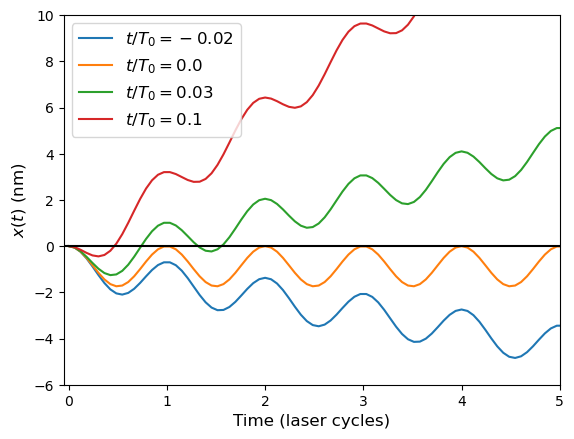

In [17]:
# Plot the free electron positions vs time

for i in range(len(tprimevals)):
    #plt.plot(w/(2*pi)*(tvals-tprimevals[i]), POSM[i]*get_AU(0,1,0,0)[1]*1e9, label=r"$t/T_0={}$".format(tprimevals[i]*w/(2*pi)))
    plt.plot(w/(2*pi)*(tvals), POSM[i]*get_AU(0,1,0,0)[1]*1e9, label=r"$t/T_0={}$".format(tprimevals[i]*w/(2*pi)))

    
plt.hlines(0,xmin=-1, xmax=5, color='k')

plt.legend(fontsize='large')
plt.xlabel('Time (laser cycles)', fontsize='large')
plt.ylabel(r'$x(t)$ (nm)', fontsize='large')

plt.xlim((-0.05,5))
plt.ylim(-6,10)

plt.show()

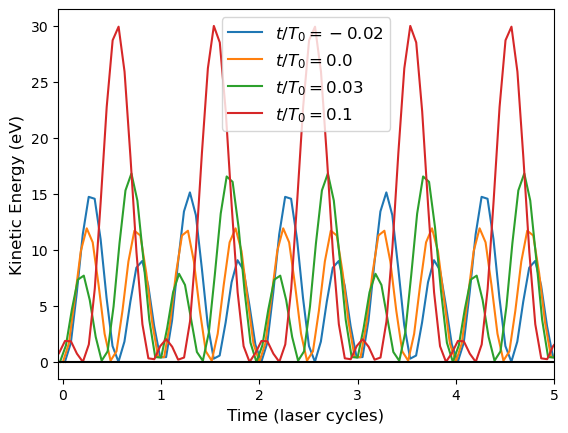

In [18]:
# Plot the free electron positions vs time

for i in range(len(tprimevals)):
    plt.plot(w/(2*pi)*(tvals-tprimevals[i]), KEM[i]*get_AU(1,2,-2,0)[1]/e, label=r"$t/T_0={}$".format(tprimevals[i]*w/(2*pi)))
    
plt.hlines(0,xmin=-1, xmax=5, color='k')

plt.legend(fontsize='large')
plt.xlabel('Time (laser cycles)', fontsize='large')
plt.ylabel(r'Kinetic Energy (eV)', fontsize='large')

plt.xlim((-0.05,5))
#plt.ylim(-6,10)

plt.show()

In [19]:
def get_recombination_t(tprime):
    '''
    return the recombination time for an electron ionized at time tprime
    tprime: ionization time
    note: this function only works for tprime > 0
    '''
    def posx(t): # positon function with tprime assigned
        return x(t,tprime)
    
    def abs_posx(t):
        return abs(x(t,tprime)) # absolute value of position function with tprime assigned
    
    min_x = minimize_scalar(posx,bounds=(tprime,2*pi/w), method='bounded').x # absolute minimum 
    
    # Recombination occurs between the absolute minimum of the path and the first optical cycle
    return minimize_scalar(abs_posx,bounds=(min_x,2*pi/w+1e-15), method='bounded').x 

In [20]:
get_recombination_t(0) * w / (2*pi)

0.999999942395981

In [21]:
t_ionization = np.linspace(0,1/4,50) * 2*pi/w
t_recombination = np.array([get_recombination_t(tprime) for tprime in t_ionization])
harmonic_energy = T(t_recombination,t_ionization)

In [22]:
t_recombination - t_ionization

array([1.10319976e+02, 9.90186738e+01, 9.41404105e+01, 9.02783160e+01,
       8.69295659e+01, 8.39017884e+01, 8.10973873e+01, 7.84589610e+01,
       7.59494677e+01, 7.35434052e+01, 7.12223622e+01, 6.89725447e+01,
       6.67833391e+01, 6.46463389e+01, 6.25547990e+01, 6.05031817e+01,
       5.84868924e+01, 5.65020715e+01, 5.45454290e+01, 5.26141462e+01,
       5.07057735e+01, 4.88181863e+01, 4.69495000e+01, 4.50980557e+01,
       4.32623725e+01, 4.14411241e+01, 3.96331209e+01, 3.78372769e+01,
       3.60526099e+01, 3.42782242e+01, 3.25132924e+01, 3.07570580e+01,
       2.90088118e+01, 2.72679041e+01, 2.55337253e+01, 2.38056961e+01,
       2.20832854e+01, 2.03659898e+01, 1.86533200e+01, 1.69448176e+01,
       1.52400488e+01, 1.35385937e+01, 1.18400462e+01, 1.01440174e+01,
       8.45012508e+00, 6.75800108e+00, 5.06727939e+00, 3.37760627e+00,
       1.68862714e+00, 1.61745509e-04])

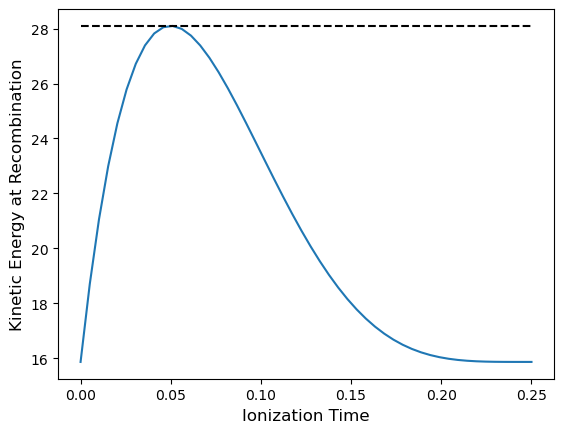

In [23]:
plt.plot(t_ionization*w/(2*pi), (harmonic_energy+Ip)/w)
plt.xlabel('Ionization Time', fontsize='large')
plt.ylabel('Kinetic Energy at Recombination', fontsize='large')
plt.hlines((3.17*Up(E0,w)+Ip)/w, xmin = t_ionization[0]*w/(2*pi), xmax = t_ionization[-1]*w/(2*pi), color='k', linestyles='--', label=r'$3.17 U_p+I_p$')
